<a href="https://colab.research.google.com/github/KeerHu73/visualization/blob/main/assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the csv file
df = pd.read_csv('/TMEDTREND_PUBLIC_241126.csv')
print(df.info())
print(df.head())
print(df.isnull().sum()) # Count the number of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26488 entries, 0 to 26487
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      26488 non-null  int64  
 1   quarter                   26488 non-null  object 
 2   Bene_Geo_Desc             26488 non-null  object 
 3   Bene_Mdcd_Mdcr_Enrl_Stus  26488 non-null  object 
 4   Bene_Race_Desc            26488 non-null  object 
 5   Bene_Sex_Desc             26488 non-null  object 
 6   Bene_Mdcr_Entlmt_Stus     26488 non-null  object 
 7   Bene_Age_Desc             26488 non-null  object 
 8   Bene_RUCA_Desc            26488 non-null  object 
 9   Total_Bene_TH_Elig        23683 non-null  float64
 10  Total_PartB_Enrl          23683 non-null  float64
 11  Total_Bene_Telehealth     23628 non-null  float64
 12  Pct_Telehealth            23626 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.6+ MB
None

2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

In [5]:
df['Bene_RUCA_Desc'].fillna('Unknown', inplace=True)#fill missing vaules
df.head()

<ipython-input-5-a4cbf8601086>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bene_RUCA_Desc'].fillna('Unknown', inplace=True)#fill missing vaules


,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,0.4791
1,2020,Overall,National,All,All,All,All,All,Rural,7182616.0,7.493527e+06,2859483.0,0.3981
2,2020,Overall,National,All,All,All,All,All,Urban,23699049.0,2.463142e+07,11945312.0,0.5040
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,0.5680


The data dictionary does not explicitly document missing values;
categorical variables do not have clear missing value codes;
numeric variables have missing values, but handling methods are not specified.


I choose Pct_Telehealth, Total_Bene_Telehealth, and Bene_Age_Desc. These variables are of interest because telehealth adoption trends may differ across age groups and could be influenced by the total number of beneficiaries. Missing values in numeric columns were filled using the mean, while missing categorical values in Bene_RUCA_Desc were replaced with "Unknown" to retain all available data.

4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

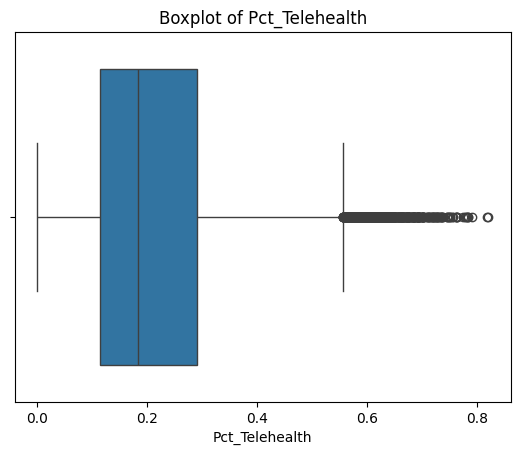

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check for outliers in Pct_Telehealth
sns.boxplot(x=df['Pct_Telehealth'])
plt.title('Boxplot of Pct_Telehealth')
plt.show()

It revealed several high-value outliers above the 75th percentile, suggesting that telehealth adoption varies significantly across different groups. Most values fall between 0.1 and 0.3, indicating that telehealth adoption remains relatively low in general. But there are mant outliers from 0.6 to 0.8.

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

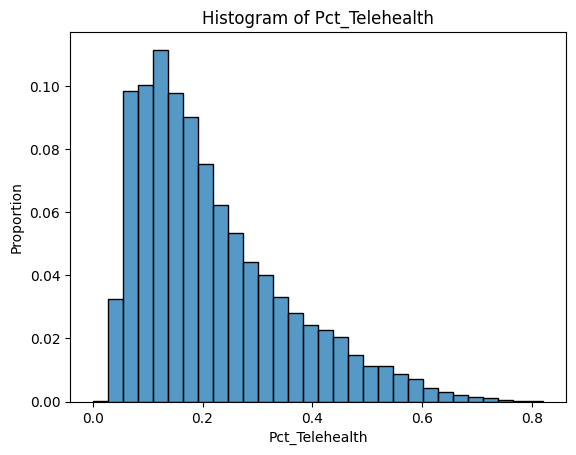

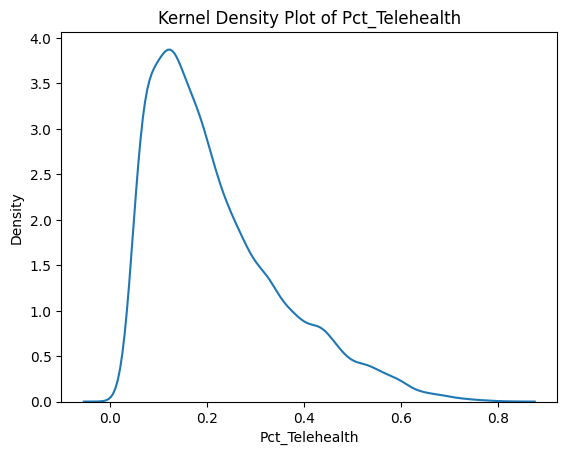

In [7]:
# Histogram to show data distribution
sns.histplot(df['Pct_Telehealth'], bins=30, stat='proportion')
plt.title('Histogram of Pct_Telehealth')
plt.show()

# Kernel Density Estimate (KDE) to smooth data distribution
sns.kdeplot(df['Pct_Telehealth'])
plt.title('Kernel Density Plot of Pct_Telehealth')
plt.show()

The histogram and KDE plot for Pct_Telehealth indicate a right-skewed distribution, with most values concentrated below 0.3. There is no clear bimodal trend, suggesting that telehealth adoption follows a continuous distribution rather than distinct usage categories. The high skewness suggests that applying a log transformation could help normalize the distribution for better analysis.

6. Create a scatter plot, and describe the relationship you see.

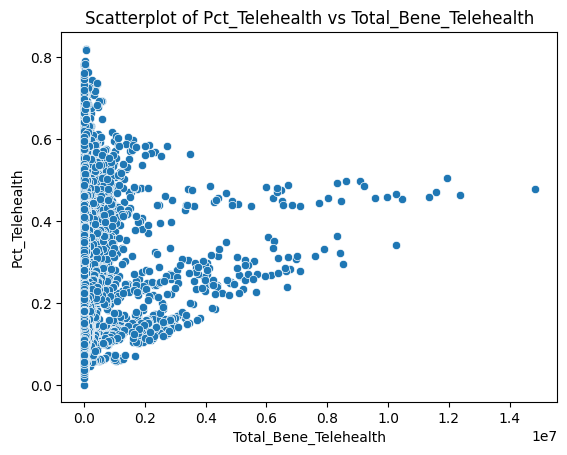

In [8]:
# Scatterplot to show the relationship between Pct_Telehealth and Total_Bene_Telehealth
sns.scatterplot(data=df, x='Total_Bene_Telehealth', y='Pct_Telehealth')
plt.title('Scatterplot of Pct_Telehealth vs Total_Bene_Telehealth')
plt.show()

The scatterplot of Pct_Telehealth against Total_Bene_Telehealth reveals a positive correlation, where regions with a higher total number of telehealth beneficiaries tend to have a higher percentage of telehealth adoption. However, there are some clusters where high telehealth adoption occurs despite a low total number of beneficiaries, indicating potential regional differences in telehealth access or policy.

7. Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.

In [9]:
# Create a cross-tabulation to compare age groups and telehealth usage
cross_tab = pd.crosstab(df['Bene_Age_Desc'], df['Pct_Telehealth'] > 10)
print(cross_tab)

# Display summary statistics for numerical columns
df.describe()

Pct_Telehealth  False
Bene_Age_Desc        
0-64             1320
65-74            1320
75-84            1320
85 and over      1320
All             21208


,Year,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
count,26488.000000,2.368300e+04,2.368300e+04,2.362800e+04,23626.000000
mean,2021.727273,5.066857e+05,6.360443e+05,1.104749e+05,0.217641
std,1.285673,2.080940e+06,2.588198e+06,5.141450e+05,0.136441
min,2020.000000,1.100000e+01,1.666667e+01,0.000000e+00,0.000000
25%,2021.000000,1.776900e+04,2.307833e+04,3.278750e+03,0.113925
50%,2022.000000,7.896600e+04,1.019587e+05,1.332950e+04,0.182500
75%,2023.000000,2.616035e+05,3.361637e+05,4.741875e+04,0.290700
max,2024.000000,3.094678e+07,3.234423e+07,1.482692e+07,0.820200


Cross-tabulation between Bene_Age_Desc and Pct_Telehealth > 10% shows that all age groups exhibit similar telehealth adoption rates, but most records fall under the "All" category, limiting precise age-based insights. The summary statistics highlight a mean telehealth adoption rate of 0.22, with a maximum value of 0.82, indicating that some regions have significantly higher adoption. A high standard deviation of 0.136 further confirms substantial variation in telehealth use across different groups.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.